In [152]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import pandas as pd 
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

In [153]:
data = pd.read_csv("HW5.csv")

for i, value  in enumerate(data["Forms_Solid_Solution_Class_Label"]):
    if "Yes" in value: 
        data.loc[i,"Forms_Solid_Solution_Class_Label"] = 1
    else: 
        data.loc[i,"Forms_Solid_Solution_Class_Label"] = -1

y = pd.DataFrame(data["Forms_Solid_Solution_Class_Label"],dtype=int)
X = pd.DataFrame(data.drop(["Forms_Solid_Solution_Class_Label","Solvent","Solute"],axis=1))

cv = ShuffleSplit(n_splits=5,random_state=123)
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Forms_Solid_Solution_Class_Label","Solvent","Solute"],axis=1), y, test_size=0.2, random_state=123)


[0.34556308 0.         0.65443692]


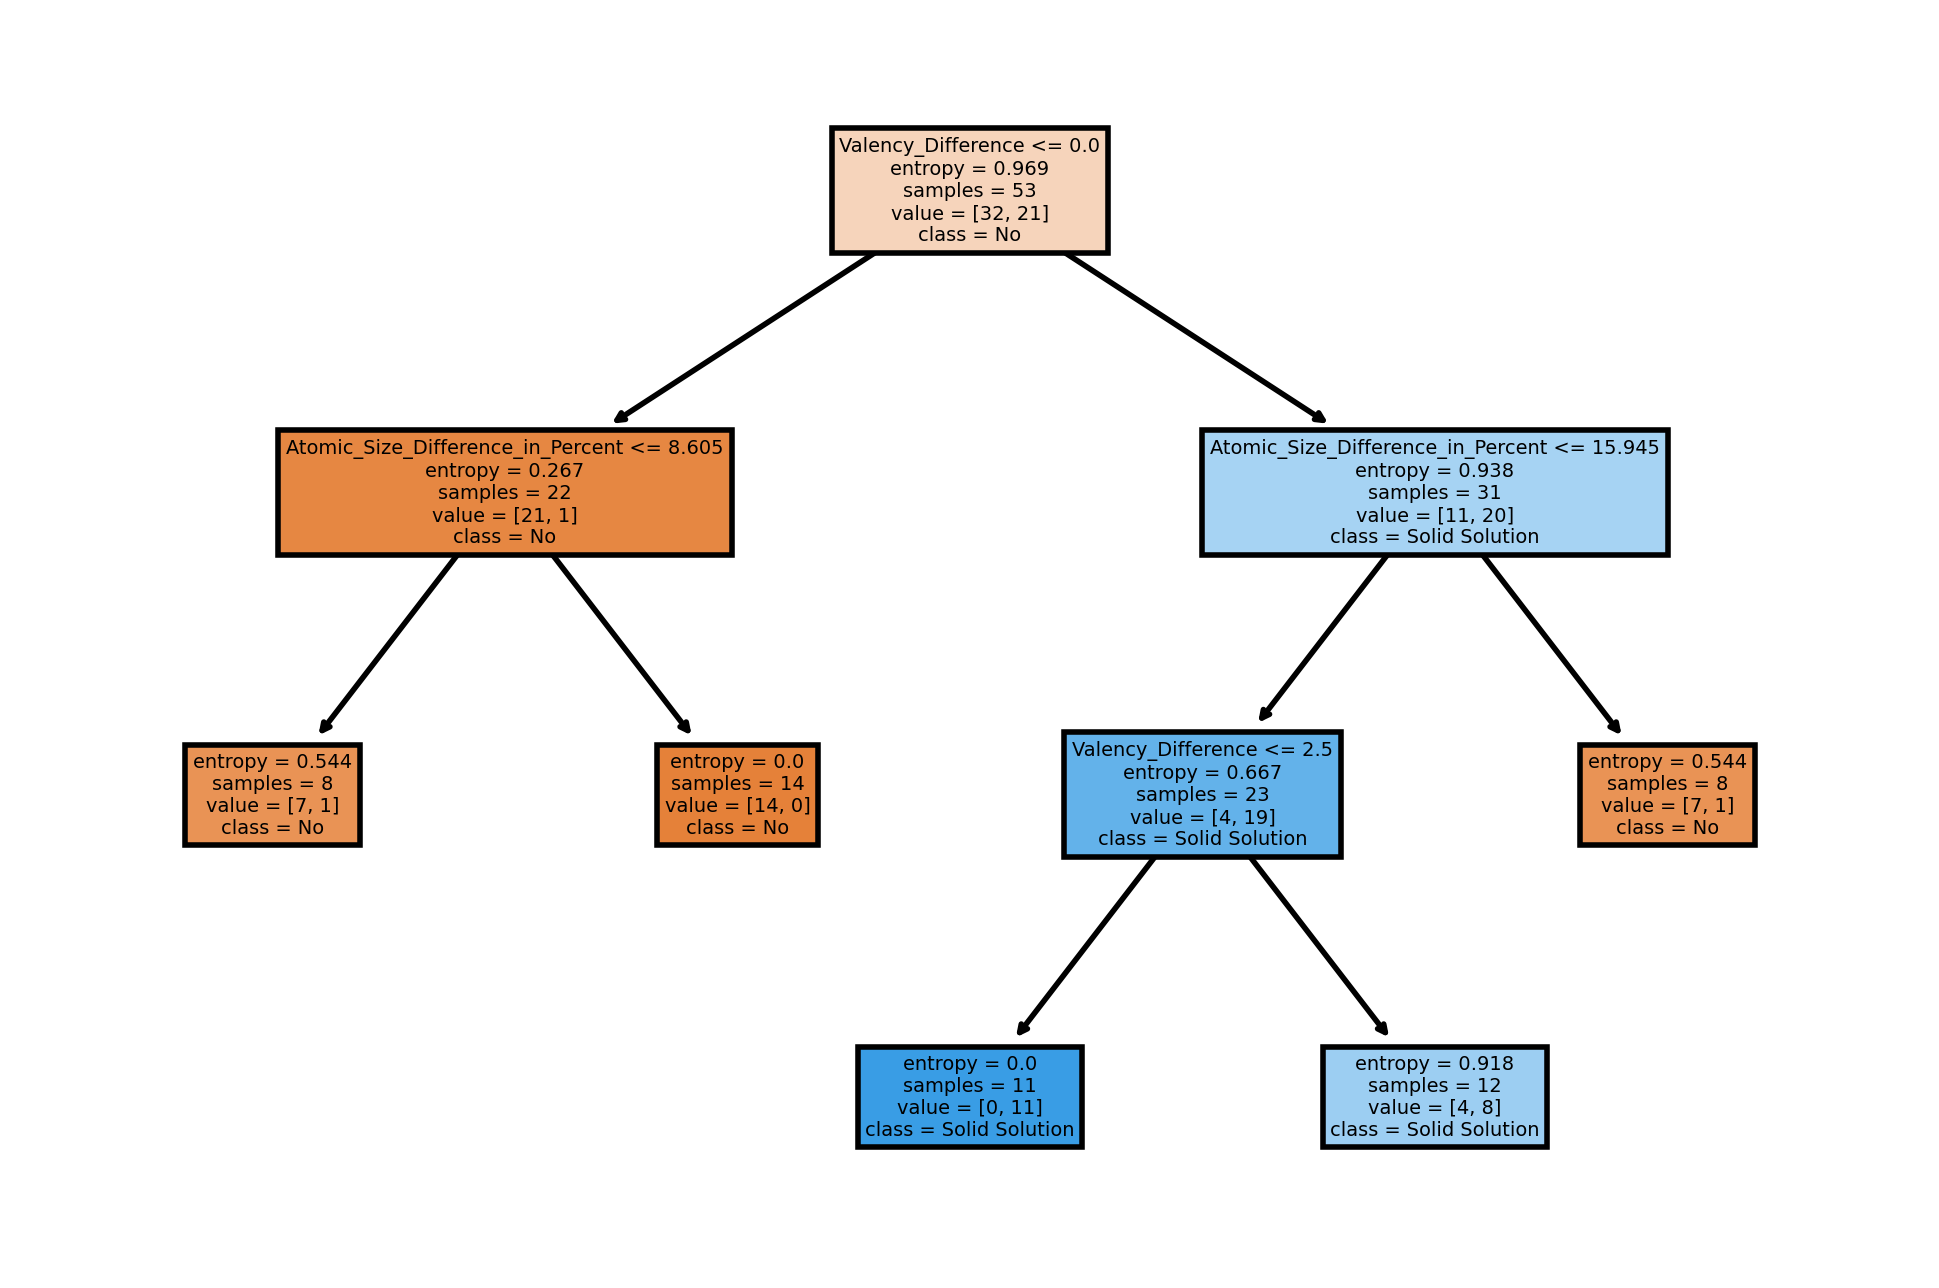

In [154]:
clf = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf=8,random_state=0)
clf_fit = clf.fit(X_train,y_train)
axs1 = plt.subplot()
tree.plot_tree(clf_fit,filled=True,feature_names= X_train.columns.values.tolist(),class_names=["No","Solid Solution"],ax=axs1 )
print(clf_fit.feature_importances_)

In [155]:
confusion = confusion_matrix(y_test,clf_fit.predict(X_test))
precision = precision_score(y_test,clf_fit.predict(X_test))
recall = recall_score(y_test,clf_fit.predict(X_test))

In [156]:
print(confusion)
print(precision)
print(recall)

[[8 1]
 [2 3]]
0.75
0.6


Text(0.5, 0, 'Minimum Leaf population')

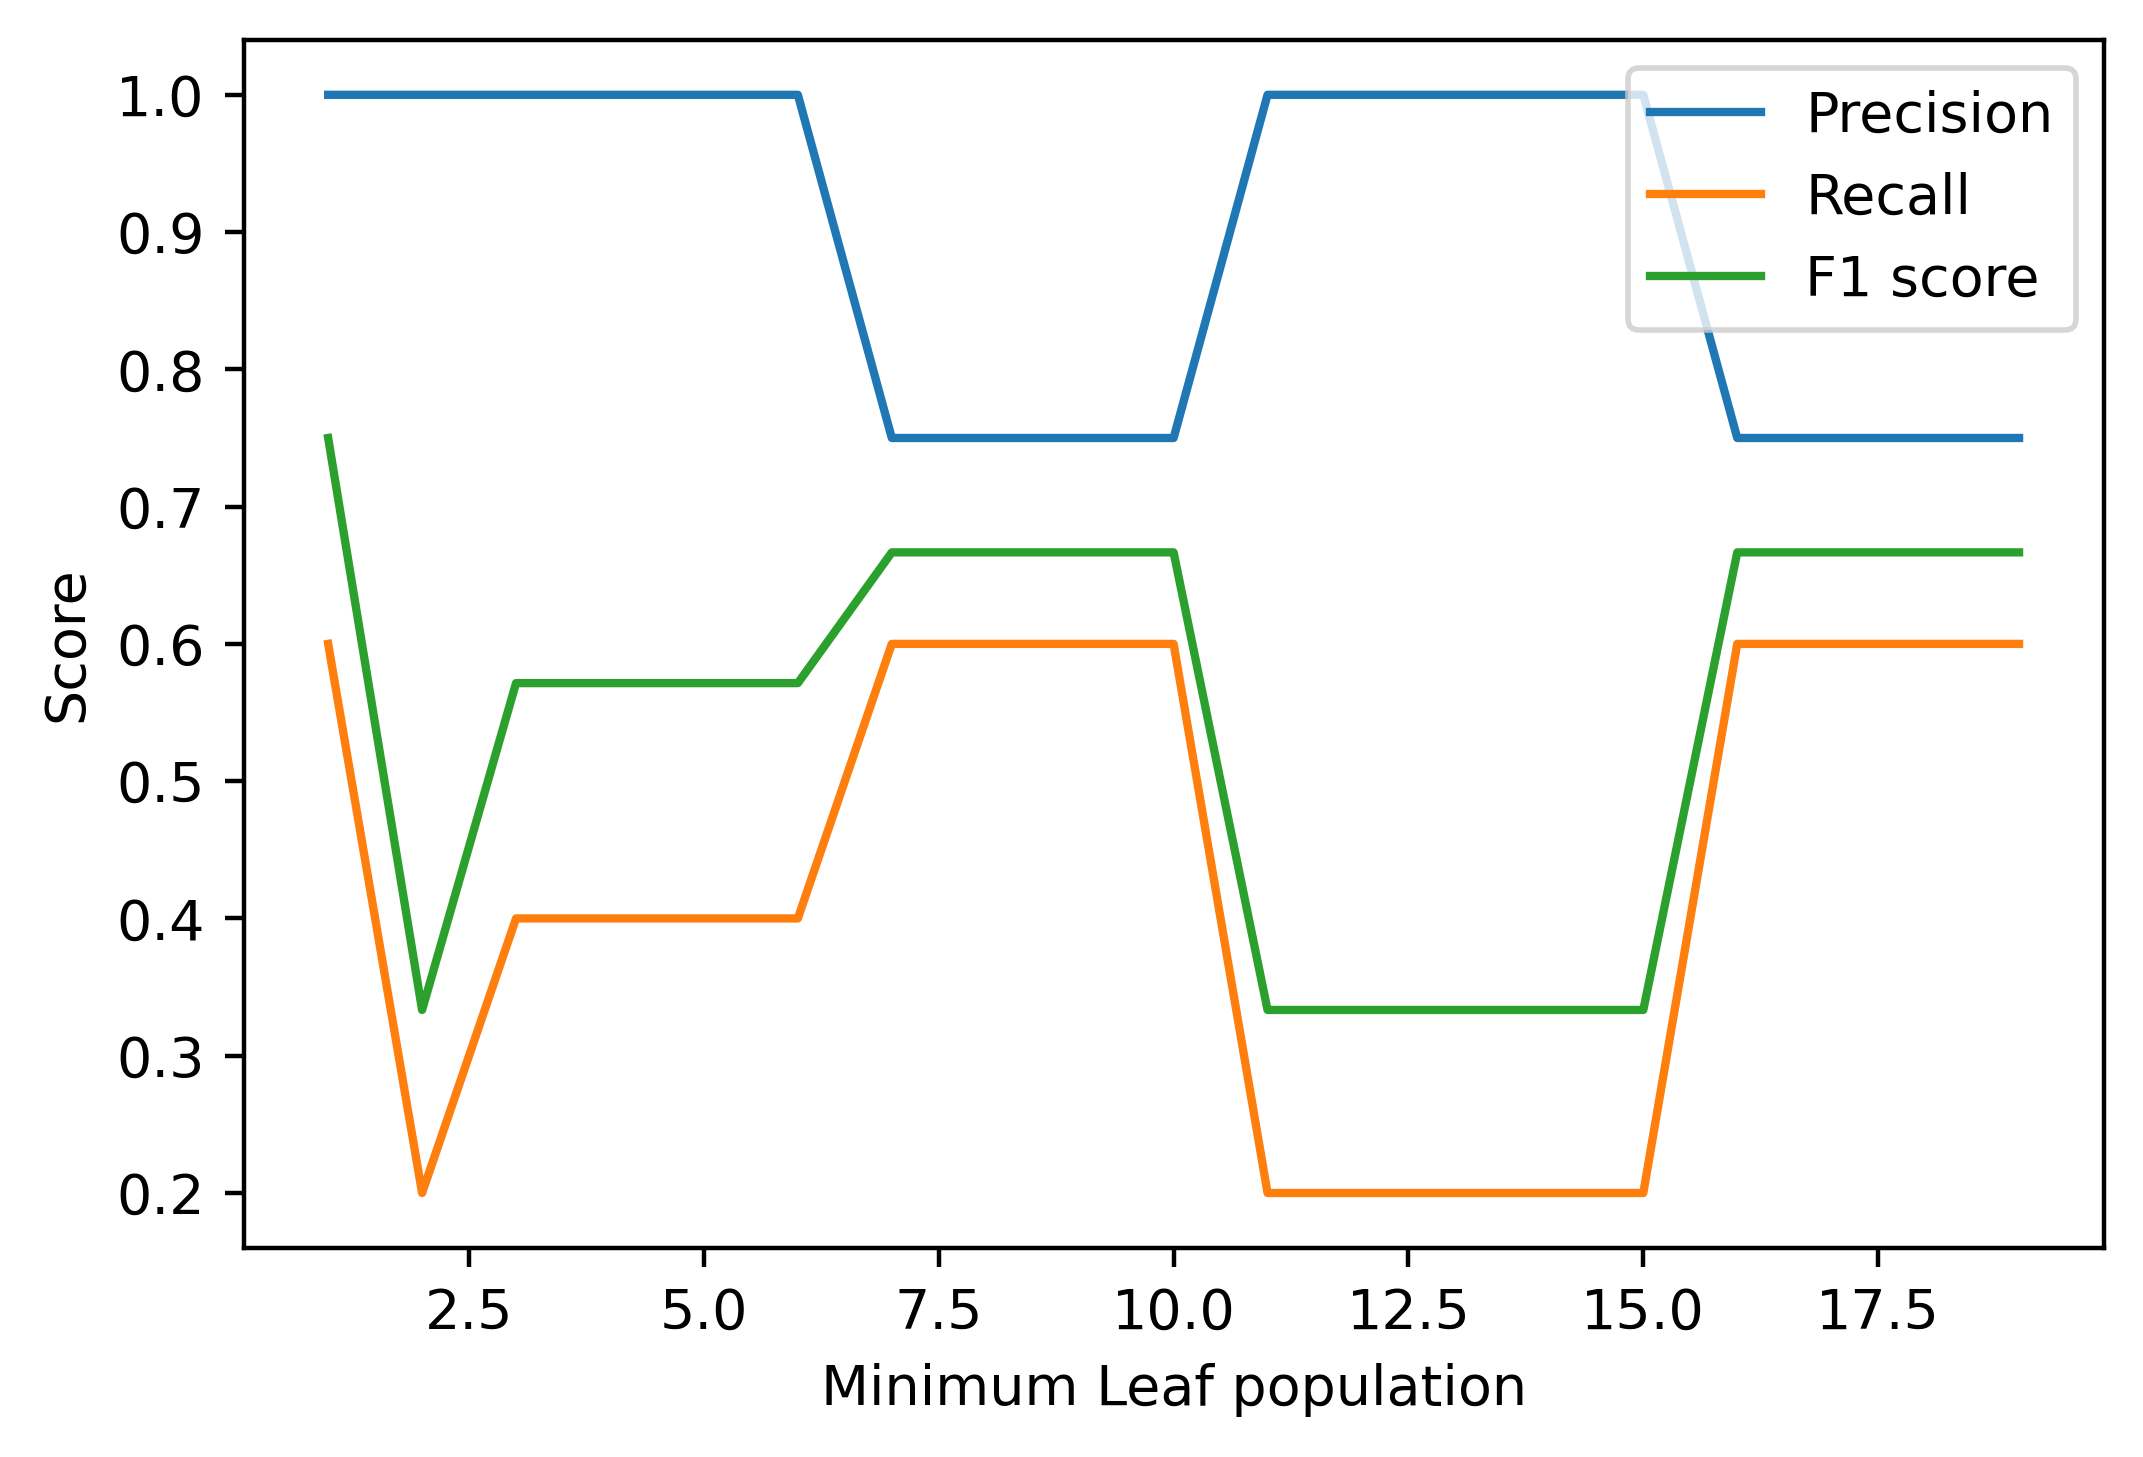

In [157]:
testrange = np.array(range(1,20))
precision_vals = np.zeros(testrange.shape)
recall_vals = np.zeros(testrange.shape)
f1_scores = np.zeros(testrange.shape)

for i in testrange:
    clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i)
    clf_fit = clf.fit(X_train,y_train)
    precision_vals[i-1] = precision_score(y_test,clf_fit.predict(X_test))
    recall_vals[i-1] = recall_score(y_test,clf_fit.predict(X_test))
    f1_scores[i-1] = f1_score(y_test,clf_fit.predict(X_test))

plt.plot(testrange, precision_vals)
plt.plot(testrange,recall_vals)
plt.plot(testrange,f1_scores)
plt.legend(["Precision", "Recall","F1 score"])
plt.ylabel("Score")
plt.xlabel("Minimum Leaf population")
    

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Text(0.5, 0, 'Minimum Leaf population')

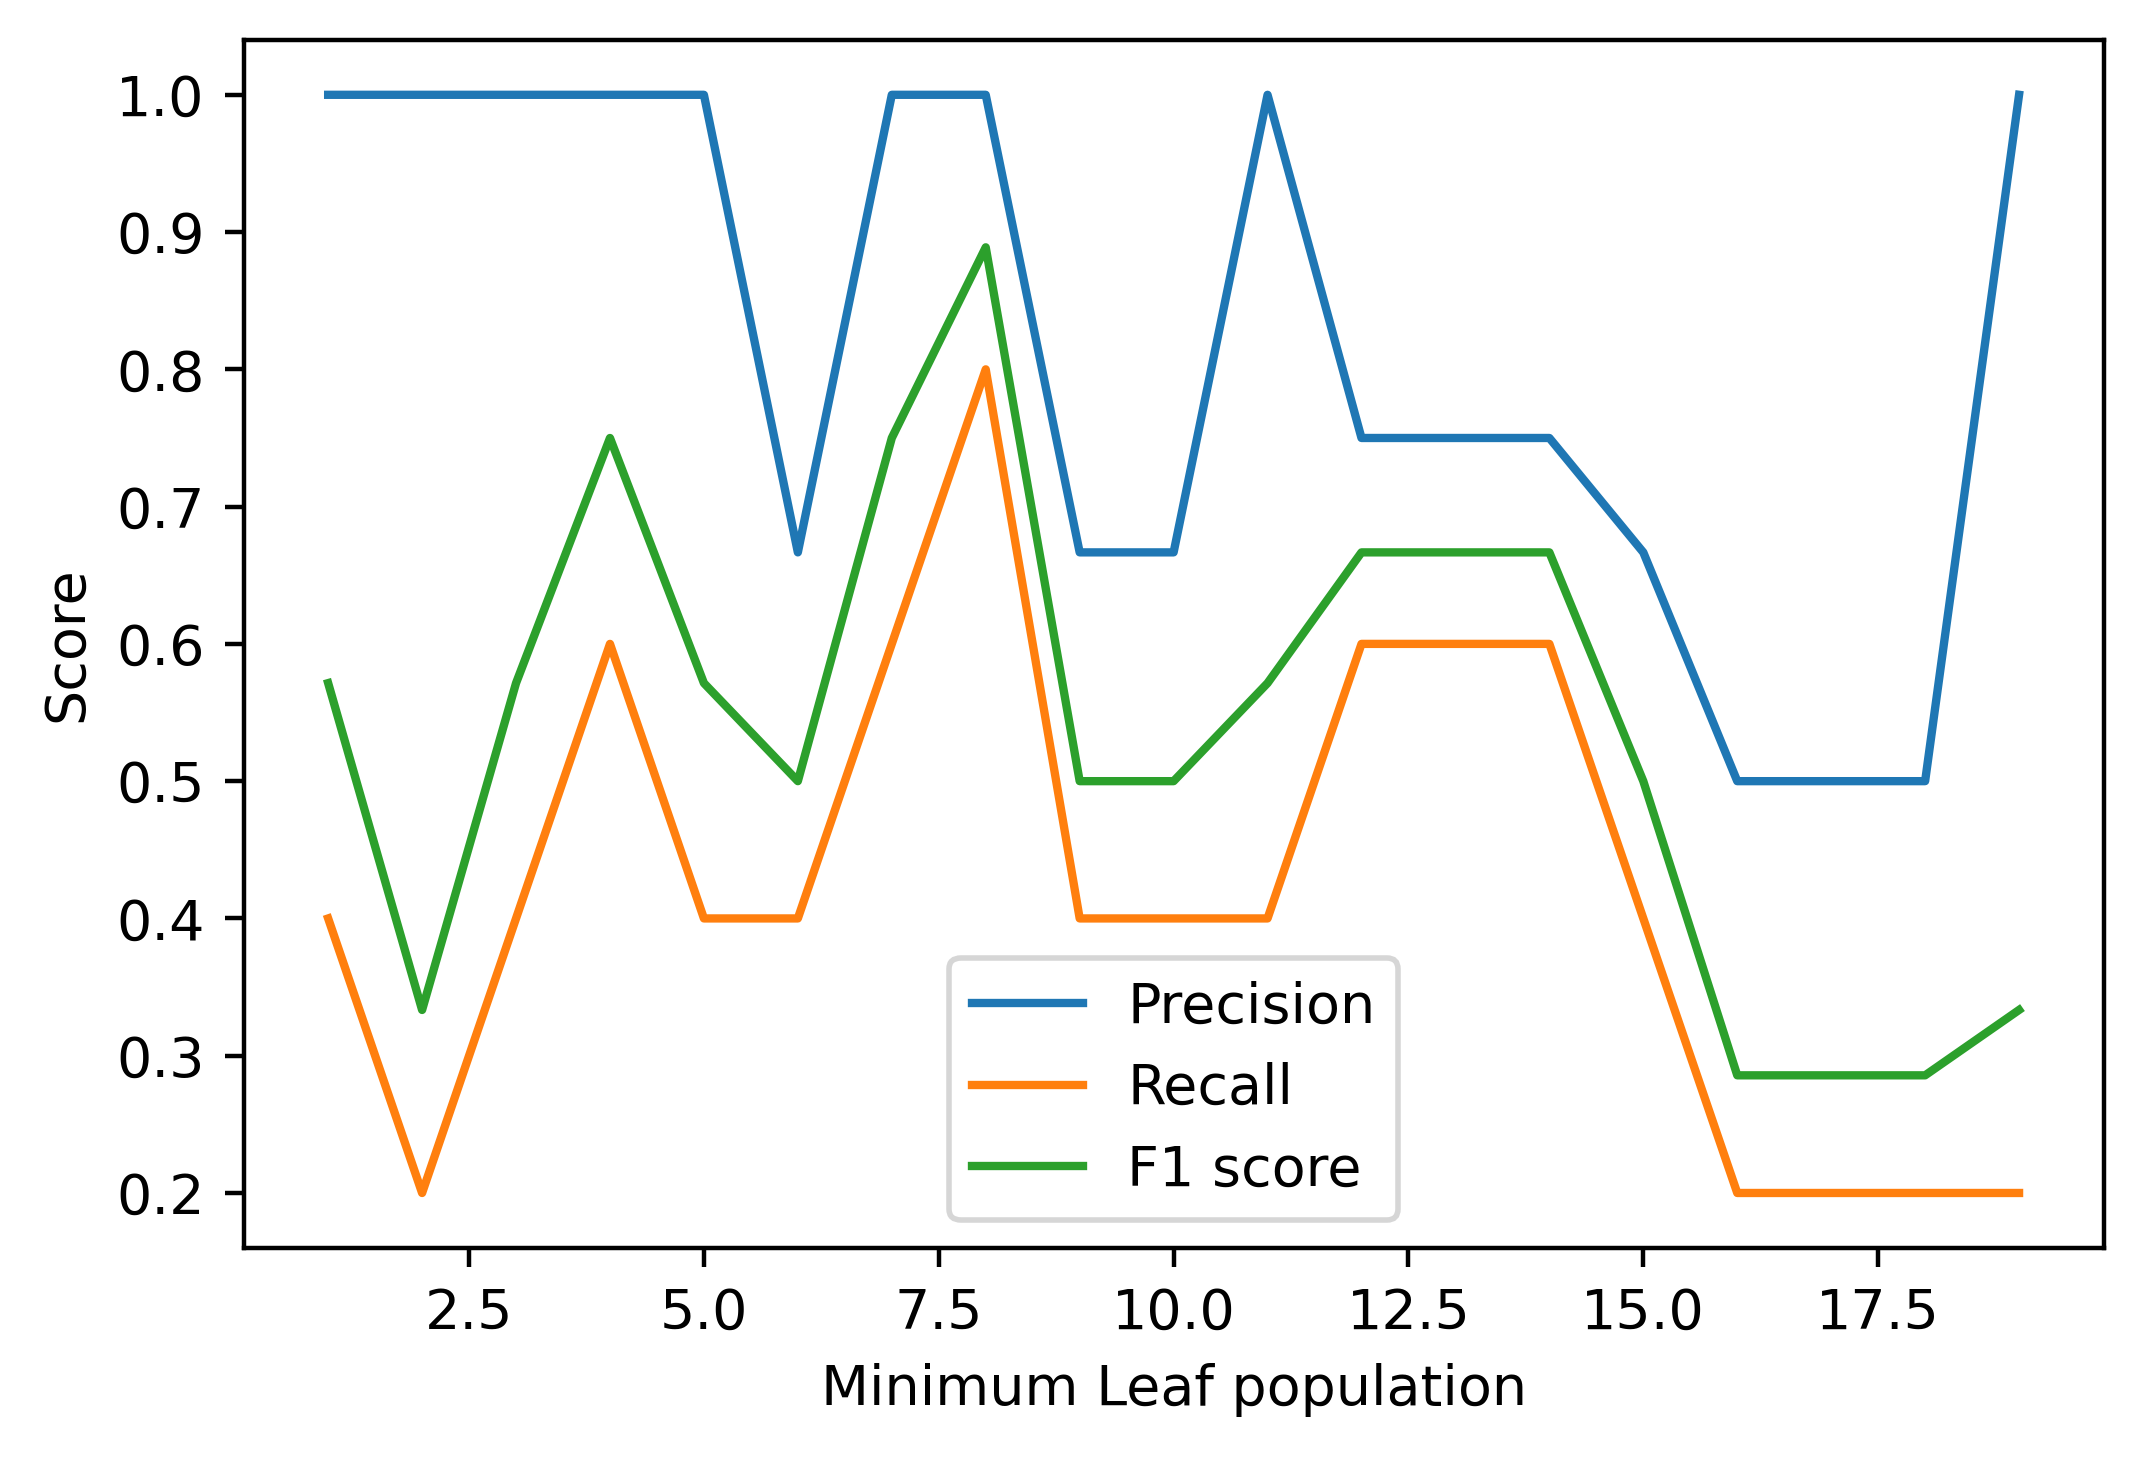

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(subsample=0.9,min_samples_leaf=4)
gbc_trained = gbc.fit(X_train,y_train)

testrange = np.array(range(1,20))
precision_vals = np.zeros(testrange.shape)
recall_vals = np.zeros(testrange.shape)
f1_scores = np.zeros(testrange.shape)

for i in testrange:
    gbc = GradientBoostingClassifier(subsample=0.9,min_samples_leaf=i)
    gbc_trained = gbc.fit(X_train,y_train)
    precision_vals[i-1] = precision_score(y_test,gbc_trained.predict(X_test))
    recall_vals[i-1] = recall_score(y_test,gbc_trained.predict(X_test))
    f1_scores[i-1] = f1_score(y_test,gbc_trained.predict(X_test))

plt.plot(testrange, precision_vals)
plt.plot(testrange,recall_vals)
plt.plot(testrange,f1_scores)
plt.legend(["Precision", "Recall","F1 score"])
plt.ylabel("Score")
plt.xlabel("Minimum Leaf population")

[0.19369306 0.26590693 0.54040001]


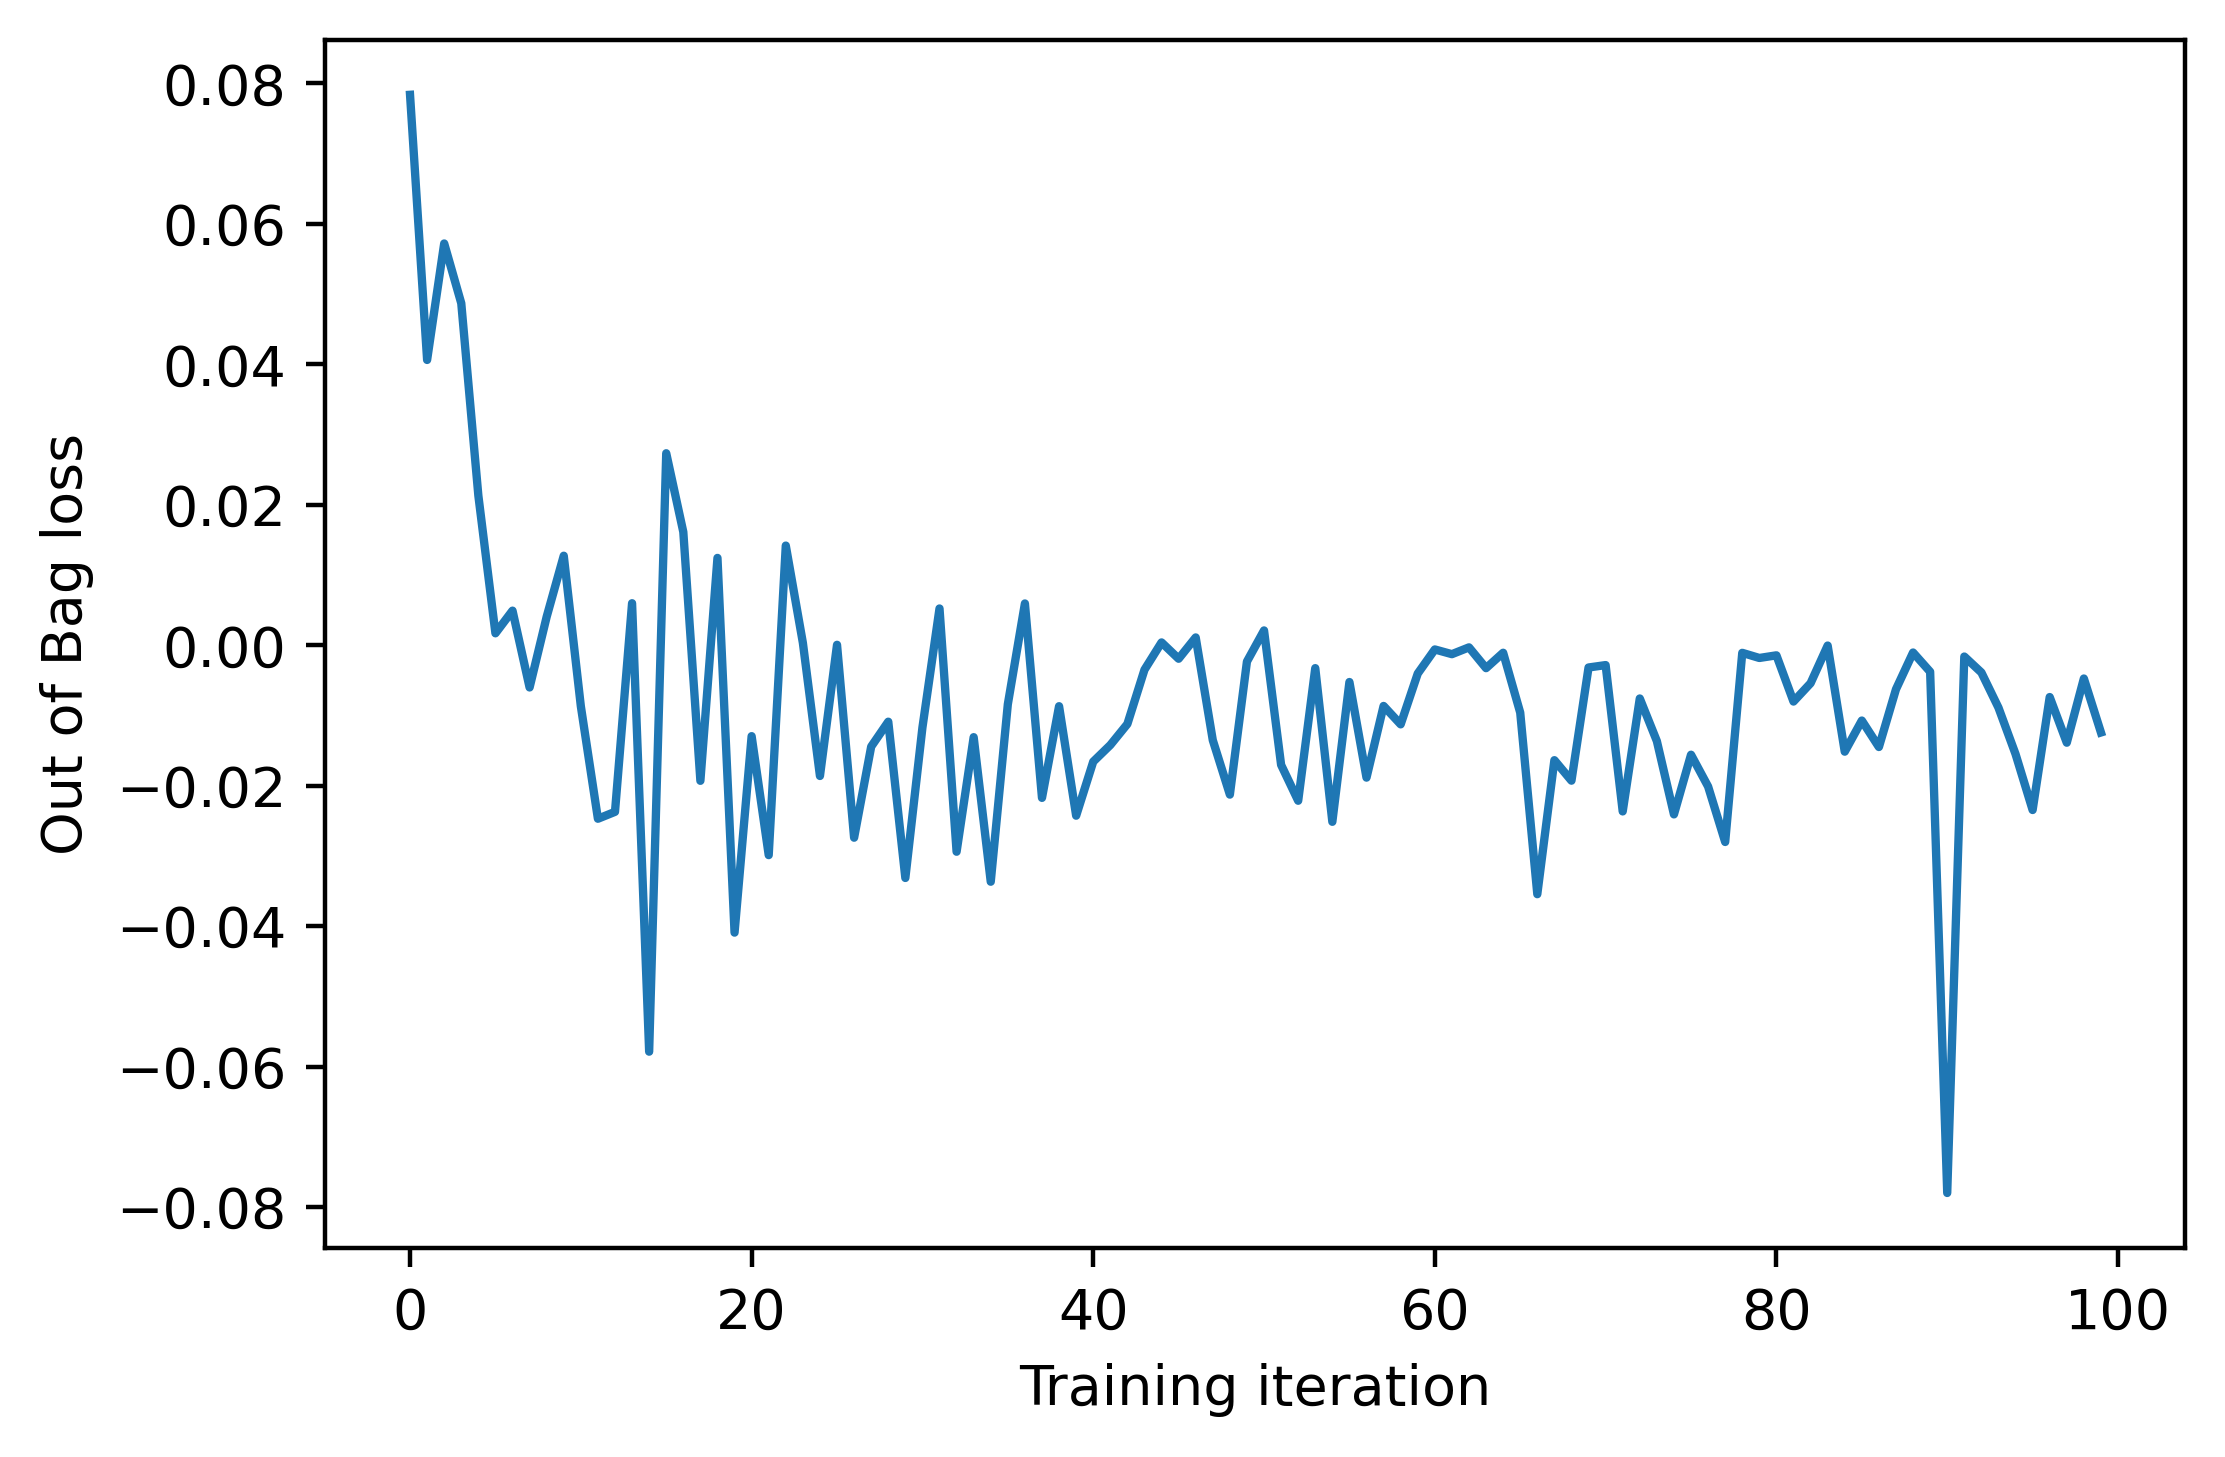

In [159]:
plt.plot(range(100),gbc_trained.oob_improvement_)
plt.ylabel("Out of Bag loss")
plt.xlabel("Training iteration")
print(gbc_trained.feature_importances_)

In [160]:
gbc = GradientBoostingClassifier(subsample=0.9,min_samples_leaf=8)
gbc_trained = gbc.fit(X_train,y_train)
print(gbc_trained.feature_importances_)
confusion = confusion_matrix(y_test,gbc_trained.predict(X_test))
precision = precision_score(y_test,gbc_trained.predict(X_test))
recall = recall_score(y_test,gbc_trained.predict(X_test))
print(confusion, precision, recall)

[0.35320271 0.1913104  0.45548689]
[[9 0]
 [3 2]] 1.0 0.4


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [161]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_trained = rfc.fit(X_train,y_train)
rfc_trained.feature_importances_


<ipython-input-161-18e479a8c138>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)


array([0.31966472, 0.28407734, 0.39625795])

<ipython-input-162-9561d3c840ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)
<ipython-input-162-9561d3c840ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)
<ipython-input-162-9561d3c840ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)
<ipython-input-162-9561d3c840ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)
<ipython-input-162-9561d3c840ba>:8: DataConversionWarning: A column-vect

Text(0.5, 0, 'Minimum Leaf population')

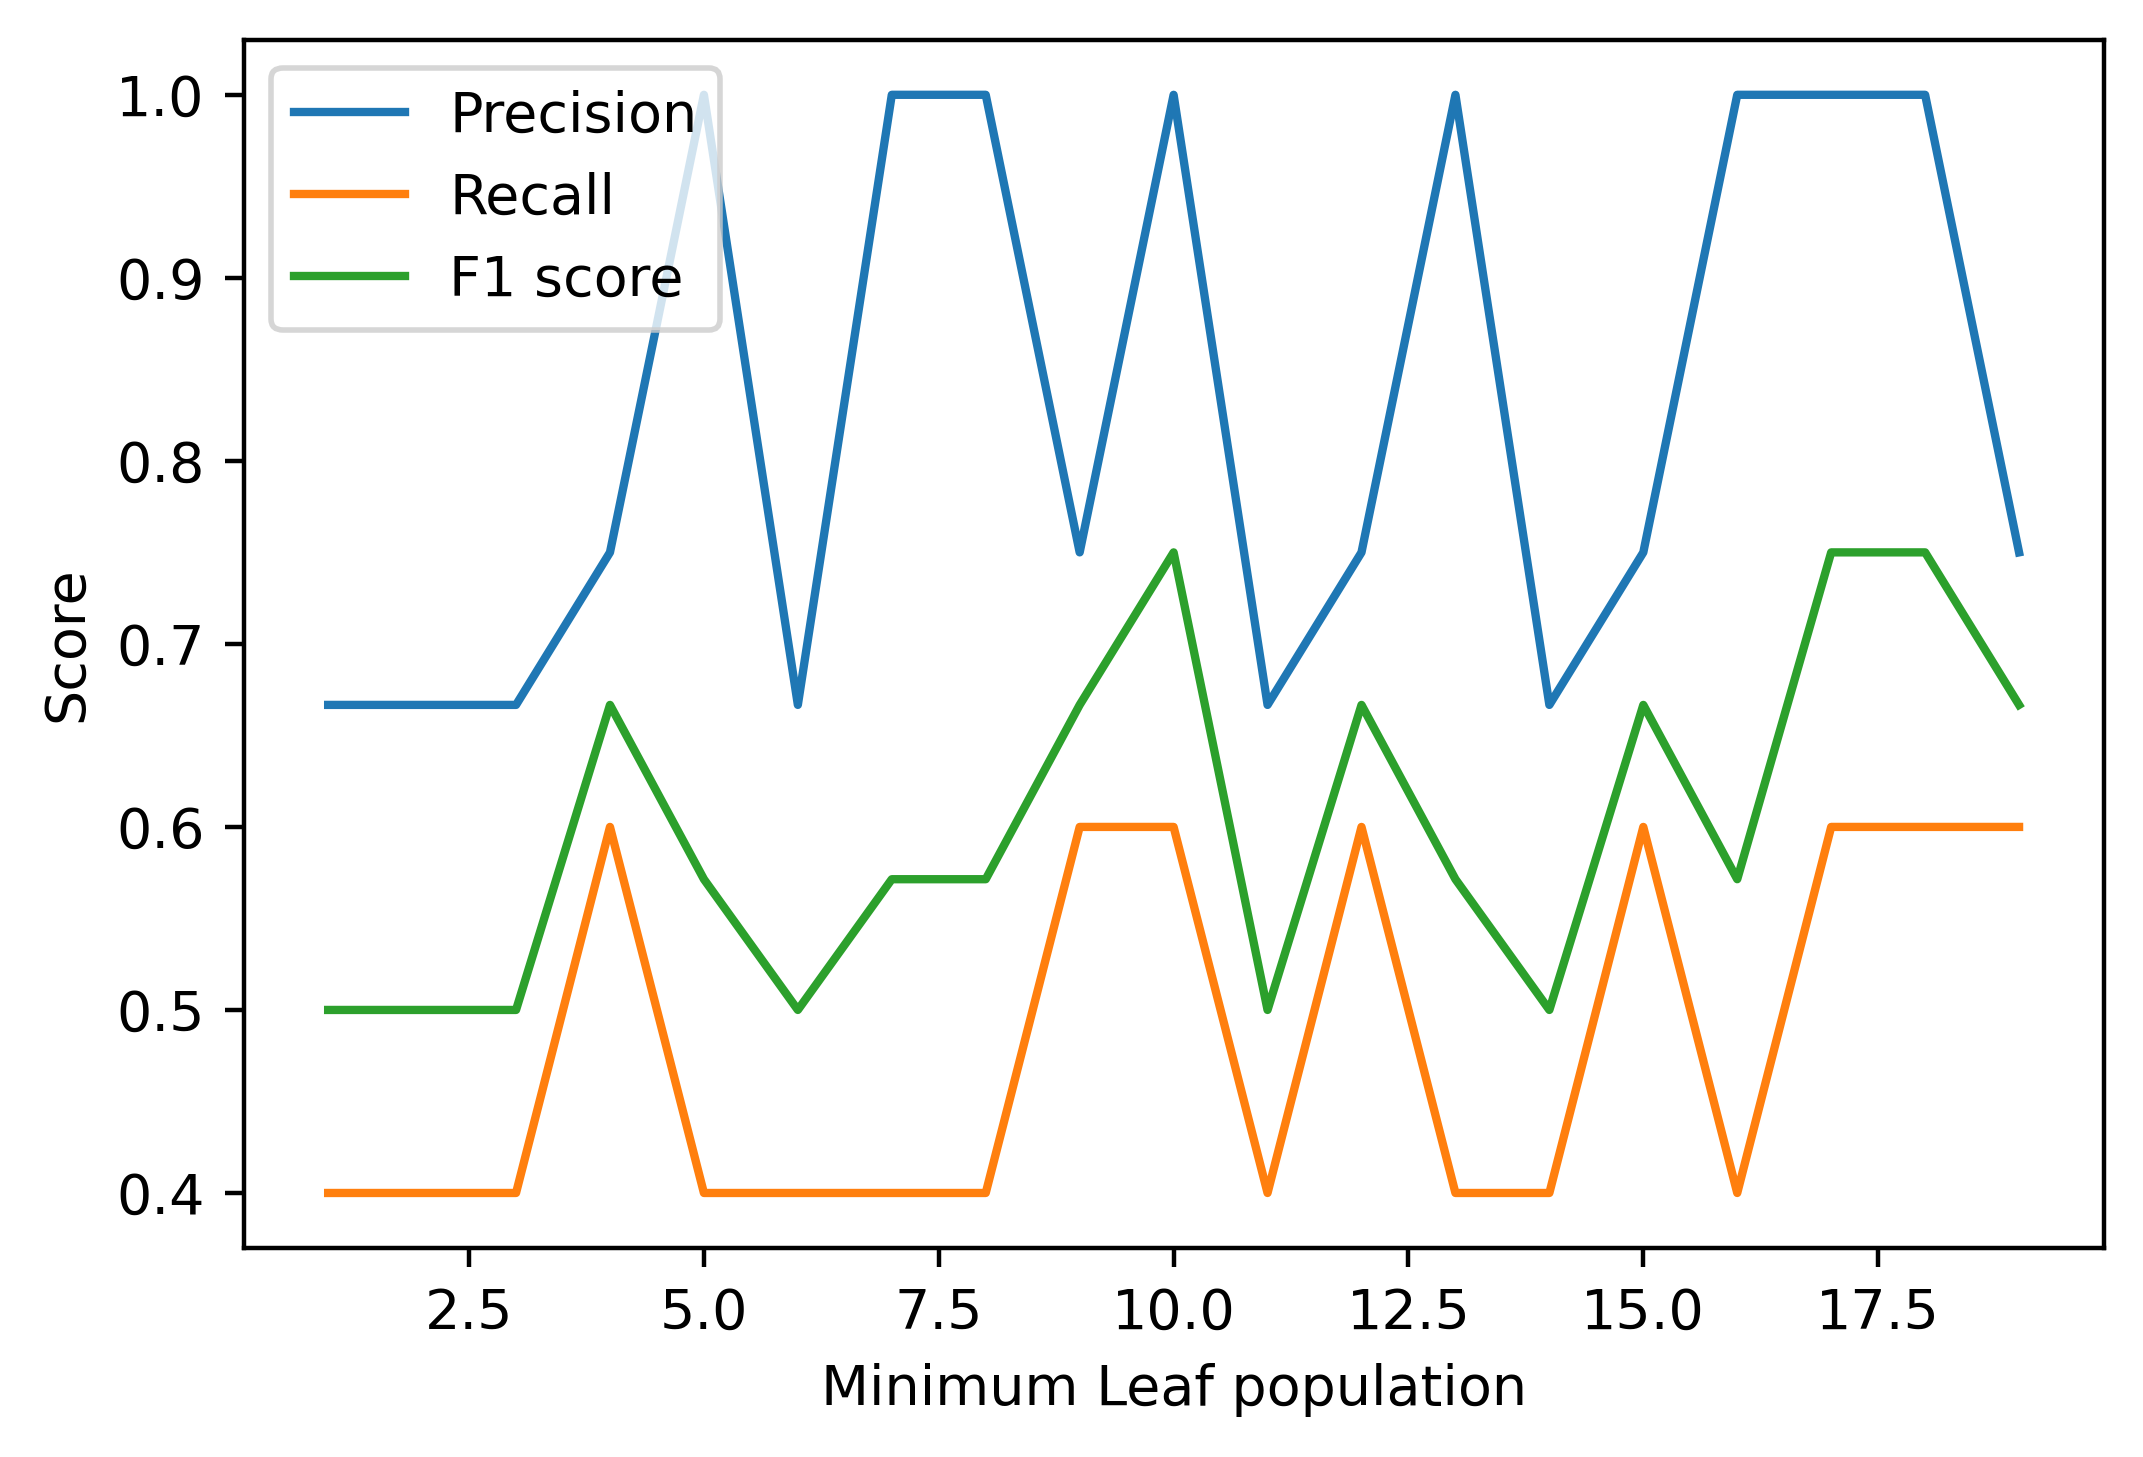

In [162]:
testrange = np.array(range(1,20))
precision_vals = np.zeros(testrange.shape)
recall_vals = np.zeros(testrange.shape)
f1_scores = np.zeros(testrange.shape)

for i in testrange:
    rfc = RandomForestClassifier(max_depth=i)
    rfc_trained = rfc.fit(X_train,y_train)
    precision_vals[i-1] = precision_score(y_test,rfc_trained.predict(X_test))
    recall_vals[i-1] = recall_score(y_test,rfc_trained.predict(X_test))
    f1_scores[i-1] = f1_score(y_test,rfc_trained.predict(X_test))

plt.plot(testrange, precision_vals)
plt.plot(testrange,recall_vals)
plt.plot(testrange,f1_scores)
plt.legend(["Precision", "Recall","F1 score"])
plt.ylabel("Score")
plt.xlabel("Minimum Leaf population")

In [168]:
rfc = RandomForestClassifier()
rfc_trained = rfc.fit(X_train,y_train)

confusion = confusion_matrix(y_test,rfc_trained.predict(X_test))
precision = precision_score(y_test,rfc_trained.predict(X_test))
recall = recall_score(y_test,rfc_trained.predict(X_test))
print(confusion, precision, recall)

[[9 0]
 [3 2]] 1.0 0.4


<ipython-input-168-ffd36b8d7773>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)


In [169]:
from sklearn.inspection import permutation_importance
clf = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf=8,random_state=0)
clf_fit = clf.fit(X_train,y_train)
gbc = GradientBoostingClassifier(subsample=0.9,min_samples_leaf=8)
gbc_trained = gbc.fit(X_train,y_train)
rfc = RandomForestClassifier()
rfc_trained = rfc.fit(X_train,y_train)

clf_pi = permutation_importance(clf_fit,X,y)
rfc_pi = permutation_importance(rfc_trained,X,y)
gbc_pi = permutation_importance(gbc_trained,X,y)
print(clf_pi["importances_mean"])
print(rfc_pi["importances_mean"])
print(gbc_pi["importances_mean"])


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-169-d5d791c66bc0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_trained = rfc.fit(X_train,y_train)


[0.15522388 0.         0.23880597]
[0.14328358 0.1641791  0.20298507]
[0.11641791 0.16119403 0.32835821]
